In [1]:
# ruff: noqa: E501
import matplotlib.pyplot as plt
import numpy as np
from rock_physics_open.equinor_utilities.std_functions import brie, wood

from fmu.pem import INTERNAL_EQUINOR

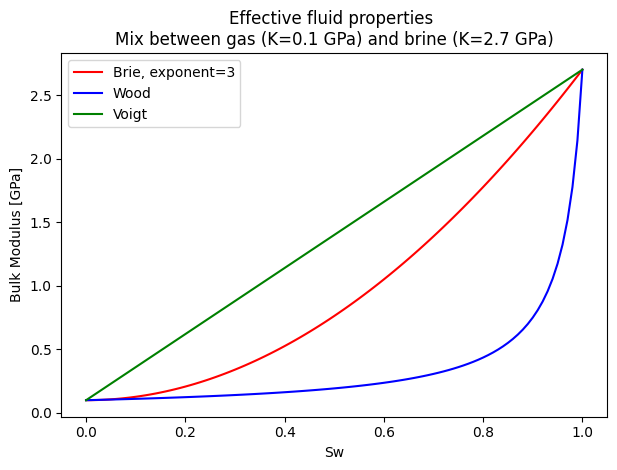

In [12]:
sw = np.linspace(0.0, 1.0, 101)
sg = 1.0 - sw
kw = 2.7e9 * np.ones_like(sw)
kg = 0.1e9 * np.ones_like(sw)
brie_exp = 3.0 * np.ones_like(sw)

k_mix_brie = brie(sg, kg, sw, kw, np.zeros_like(sw), np.ones_like(sw), brie_exp)
k_mix_wood, _ = wood(sw, kw, np.ones_like(sw), kg, np.ones_like(sw))
k_mix_voigt = sw * kw + sg * kg

plt.plot(sw, k_mix_brie / 1e9, "r-", label="Brie, exponent=3")
plt.plot(sw, k_mix_wood / 1e9, "b-", label="Wood")
plt.plot(sw, k_mix_voigt / 1e9, "g-", label="Voigt")

plt.legend()
plt.title(
    "Effective fluid properties \nMix between gas (K=0.1 GPa) and brine (K=2.7 GPa)"
)
plt.xlabel("Sw")
plt.ylabel("Bulk Modulus [GPa]")
plt.tight_layout(rect=[0, 0, 0.98, 1])
plt.savefig("../documentation/docs/images/wood_brie.png")